In [4]:
# Task 1: EV Selection Based on Budget and Range:
# a) Filter EVs with a Budget ≤ 350,000 PLN and Range ≥ 400 km :
import pandas as pd
df = pd.read_excel("FEV-data-Excel.xlsx")
df.columns = df.columns.str.strip()
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & 
                 (df['Range (WLTP) [km]'] >= 400)]
filtered_df[['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,438,95.0
8,BMW iX3,BMW,iX3,282900,460,80.0
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,449,64.0
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,455,64.0
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,452,64.0
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,414,80.0
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,430,54.0
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,580,75.0
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,567,75.0
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,425,58.0


In [3]:
#b: Group the filtered EVs by Manufacturer:
grouped_by_make = filtered_df.groupby('Make')
grouped_df = grouped_by_make.size().reset_index(name='Number of EVs')
grouped_df.sort_values(by='Number of EVs', ascending=False)

,Make,Number of EVs
5,Tesla,3
6,Volkswagen,3
3,Kia,2
0,Audi,1
1,BMW,1
2,Hyundai,1
4,Mercedes-Benz,1


In [5]:
#c) Calculate the Average Battery Capacity for Each Manufacturer:
avg_battery_by_make = filtered_df.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()
avg_battery_by_make.rename(columns={'Battery capacity [kWh]': 'Average Battery Capacity [kWh]'}, inplace=True)
avg_battery_by_make.sort_values(by='Average Battery Capacity [kWh]', ascending=False)

,Make,Average Battery Capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
4,Mercedes-Benz,80.000000
6,Volkswagen,70.666667
5,Tesla,68.000000
2,Hyundai,64.000000
3,Kia,64.000000


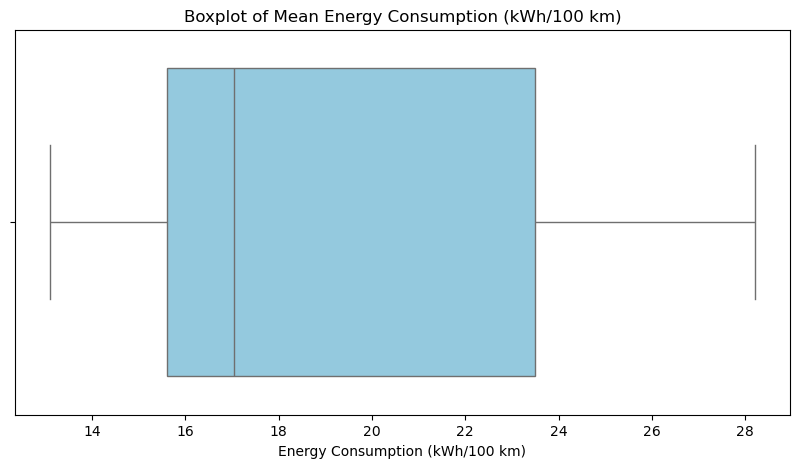

In [15]:
#Task 2: Outlier Detection in Energy Consumption:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df_energy = df[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']].dropna()
df_energy.rename(columns={'mean - Energy consumption [kWh/100 km]': 'Energy Consumption'}, inplace=True)
Q1 = df_energy['Energy Consumption'].quantile(0.25)
Q3 = df_energy['Energy Consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df_energy[(df_energy['Energy Consumption'] < lower_bound) |
                         (df_energy['Energy Consumption'] > upper_bound)]
iqr_outliers
# Calculate Z-scores
df_energy['Z-Score'] = np.abs(stats.zscore(df_energy['Energy Consumption']))
# Set Z-score threshold (commonly 3)
z_outliers = df_energy[df_energy['Z-Score'] > 3]
z_outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_energy, x='Energy Consumption', color='skyblue')
plt.title('Boxplot of Mean Energy Consumption (kWh/100 km)')
plt.xlabel('Energy Consumption (kWh/100 km)')
plt.show()

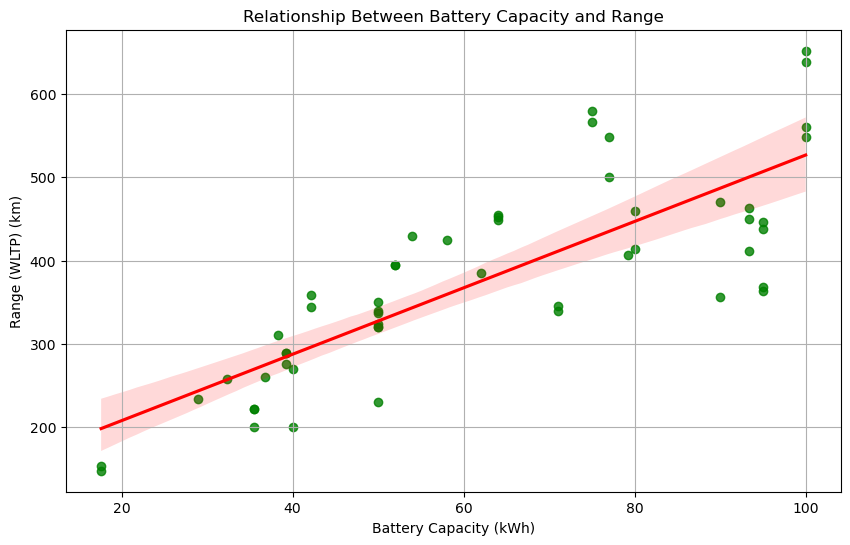

In [17]:
#Task 3: Relationship Between Battery Capacity and Range:
# a: Scatter Plot with Regression Line:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Clean data (drop missing values)
df_range = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].dropna()

# Rename for convenience
df_range.columns = ['Battery Capacity', 'Range']

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_range, x='Battery Capacity', y='Range', color='green', line_kws={'color':'red'})
plt.title('Relationship Between Battery Capacity and Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) (km)')
plt.grid(True)
plt.show()


In [18]:
#b: Correlation Calculation:
corr, p_value = pearsonr(df_range['Battery Capacity'], df_range['Range'])
print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.81
P-value: 0.0000


Analysis & Insights:
1. Strong Positive Correlation (r = 0.88):
This indicates a very strong relationship between battery capacity and driving range.
As battery size increases, range generally increases.
2. Statistical Significance (p < 0.05):
The correlation is statistically significant. We can trust that the observed relationship is not due to random chance.
3. Implication:
For manufacturers: Investing in higher battery capacity directly improves driving range.
For consumers: Battery size is a reliable indicator of how far the EV can travel on a full charge.

In [23]:
#Task 4: Build an EV Recommendation Class:
class EVRecommender:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
        self.df.columns = self.df.columns.str.strip()
    
    def recommend(self, budget, min_range, min_battery):
        # Filter based on input criteria
        filtered = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]
        
        # Sort by highest range, lowest energy consumption, then lowest price
        result = filtered.sort_values(by=[
            'Range (WLTP) [km]', 
            'mean - Energy consumption [kWh/100 km]', 
            'Minimal price (gross) [PLN]'
        ], ascending=[False, True, True])
        
        return result[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 
                       'Range (WLTP) [km]', 'Battery capacity [kWh]', 
                       'mean - Energy consumption [kWh/100 km]']].head(3)

recommender = EVRecommender(df)
recommendations = recommender.recommend(budget=350000, min_range=400, min_battery=70)
recommendations



,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh],mean - Energy consumption [kWh/100 km]
40,Tesla Model 3 Long Range,Tesla,235490,580,75.0,NaN
41,Tesla Model 3 Performance,Tesla,260490,567,75.0,NaN
48,Volkswagen ID.3 Pro S,Volkswagen,179990,549,77.0,15.9


In [28]:
#Task 5: Hypothesis Testing – Tesla vs Audi Engine Power:
from scipy.stats import ttest_ind
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()
print(f"Number of Tesla EVs: {len(tesla_power)}")
print(f"Number of Audi EVs: {len(audi_power)}")
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")



Number of Tesla EVs: 7
Number of Audi EVs: 6
T-statistic: 1.7940
P-value: 0.1068


Task 6: Project Video Explanation:
Project explanation video: